In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Henry's fork discharge dataset
df = pd.read_pickle('WoodlandsDTW_WY2013-2017.pkl')

# Print the first and last 10 records just to make sure we loaded the data okay
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,m,D,H,M,S,DTW_ft,DTW_m,SerDates
0,2013,10,1,0,0,0,154.19,46.997112,2013-10-01 00:00:00
1,2013,10,1,1,0,0,154.17,46.991016,2013-10-01 01:00:00
2,2013,10,1,2,0,0,154.17,46.991016,2013-10-01 02:00:00
3,2013,10,1,3,0,0,154.16,46.987968,2013-10-01 03:00:00
4,2013,10,1,4,0,0,154.15,46.984920,2013-10-01 04:00:00
5,2013,10,1,5,0,0,154.13,46.978824,2013-10-01 05:00:00
6,2013,10,1,6,0,0,154.13,46.978824,2013-10-01 06:00:00
7,2013,10,1,7,0,0,154.12,46.975776,2013-10-01 07:00:00
8,2013,10,1,8,0,0,154.11,46.972728,2013-10-01 08:00:00
9,2013,10,1,9,0,0,154.10,46.969680,2013-10-01 09:00:00


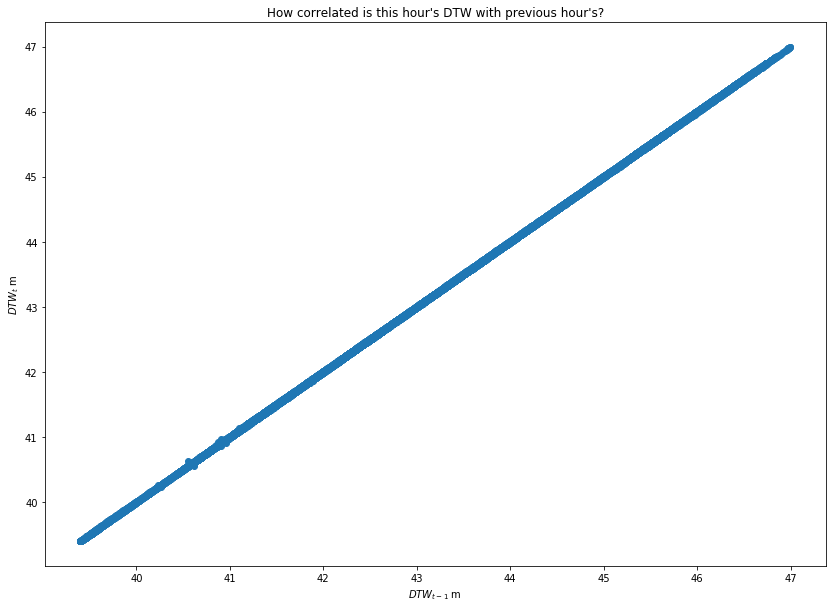

In [15]:
DTW = df['DTW_m'].values
DTWt   = DTW[1:-1] 
DTWtm1 = DTW[0:-2]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(DTWtm1,DTWt,'o')
plt.title('How correlated is this hour\'s DTW with previous hour\'s?')
plt.xlabel('$DTW_{t-1}$ m')
plt.ylabel('$DTW_t$ m')
plt.show()

In [16]:
R = np.corrcoef(DTWtm1,DTWt)
R[1,0]

0.9999970424260658

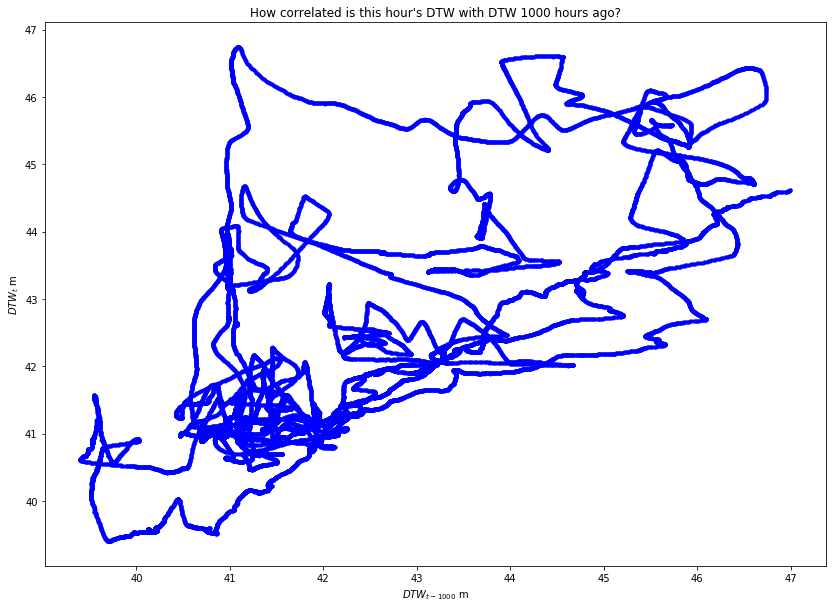

In [35]:
DTWt   = DTW[1000:-1] 
DTWtmk = DTW[0:-(1001)]
# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(DTWtmk,DTWt,'b.')
plt.title('How correlated is this hour\'s DTW with DTW 1000 hours ago?')
plt.xlabel('$DTW_{t-1000}$ m')
plt.ylabel('$DTW_t$ m')
plt.show()


In [18]:
R = np.corrcoef(DTWtmk,DTWt)
R[1,0]

0.96376505811136792

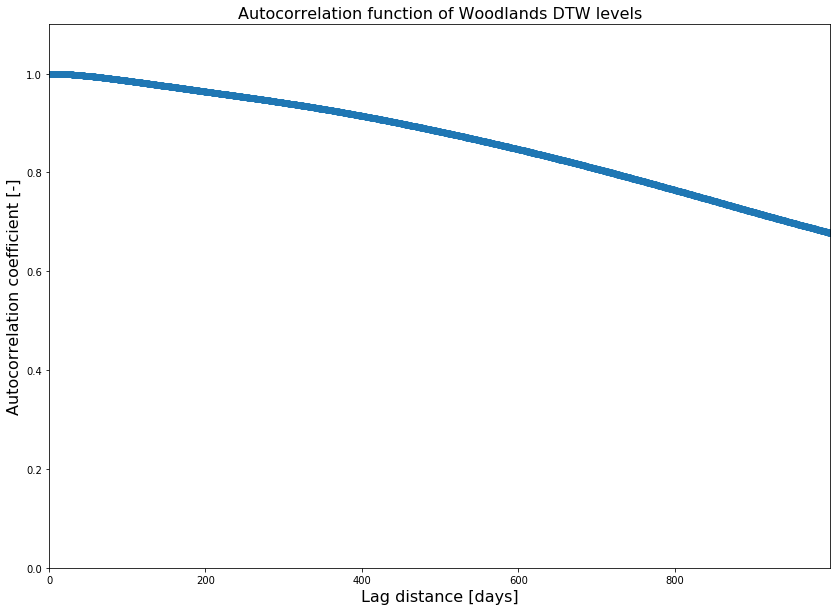

In [36]:

Nk = 1000
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    DTWt   = DTW[k:-1] 
    DTWtmk = DTW[0:-(1+k)]
    R = np.corrcoef(DTWtmk,DTWt)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Woodlands DTW levels',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

In [33]:
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df['DTW_m'])

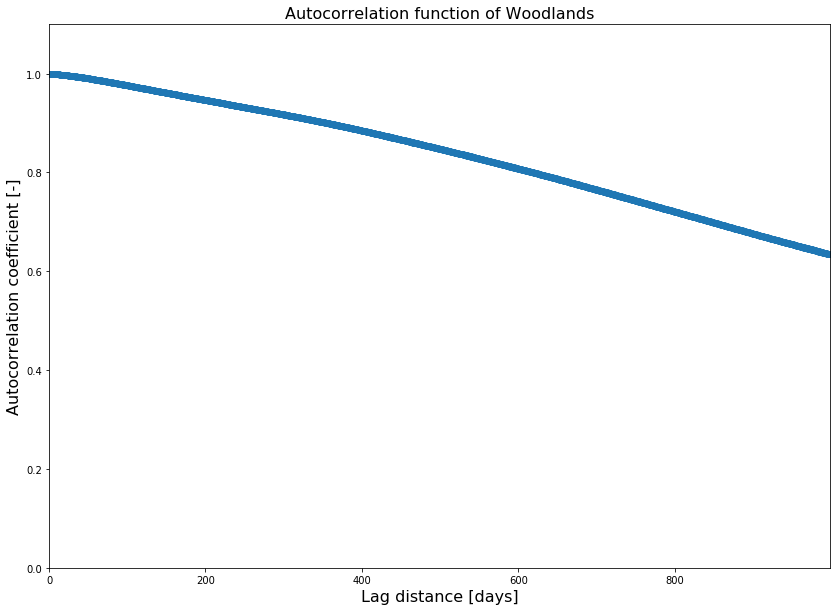

In [41]:
DTWp = DTW - np.mean(DTW)

autocovs2 = np.correlate(DTWp, DTWp, mode='full')

N = autocovs2.size

autocovs2_oneside = autocovs2[N//2:]

autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10))
plt.plot(K,autocorrs2_oneside[0:Nk],'o')
plt.ylim(0.0,1.1)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.title('Autocorrelation function of Woodlands',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

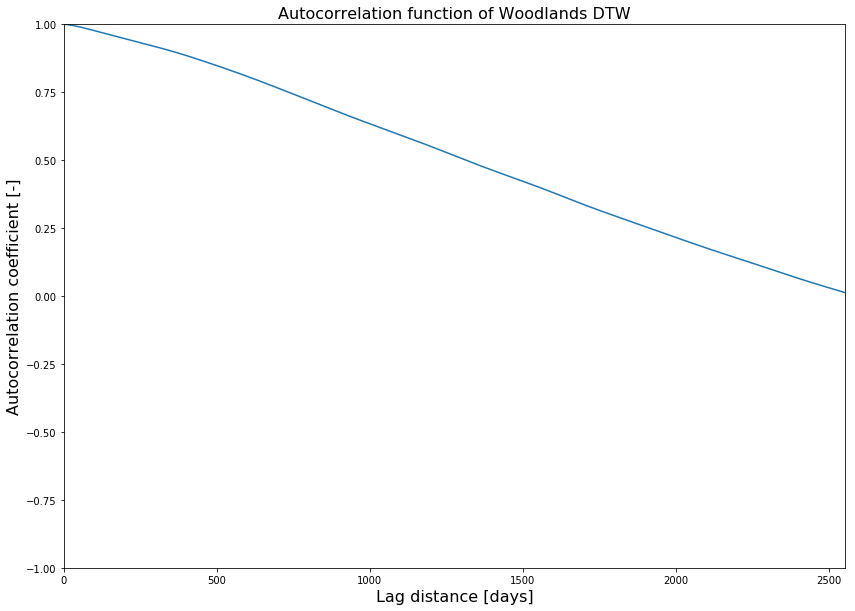

In [40]:
Nk2 = 365*7
K2 = np.arange(0,Nk2,1)

plt.figure(figsize=(14,10))
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of Woodlands DTW',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()